In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
from matplotlib.mlab import PCA as mlabPCA

In [2]:
file = 'table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls'

raw = pd.read_excel(file, skiprows=4)
raw.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [3]:
#Clean data

#Propertycrime=α+Population+Population2+Murder+Robbery

raw2 = pd.DataFrame(raw.iloc[:,[8,0, 1,3,6]])
raw2.columns = ['PropertyCrime','City','Population','Murder','Robbery']
raw2.head()

,PropertyCrime,City,Population,Murder,Robbery
0,12.0,Adams Village,1861.0,0.0,0.0
1,24.0,Addison Town and Village,2577.0,0.0,0.0
2,16.0,Akron Village,2846.0,0.0,0.0
3,4090.0,Albany,97956.0,8.0,227.0
4,223.0,Albion Village,6388.0,0.0,4.0


In [4]:
#Check for null rows
raw2[raw2.isnull().any(axis=1)]
raw2.dropna(inplace=True)

#Classify Robbery and Murder into 0 and 1
raw2['Robbery'] = np.where(raw2.Robbery > 0, 1, 0)
raw2['Murder'] = np.where(raw2.Murder > 0, 1, 0)
raw2['PopulationSq'] = raw2.Population ** 2
#Remove New York
raw2 = raw2[raw2.City != 'New York']

raw2.head()

,PropertyCrime,City,Population,Murder,Robbery,PopulationSq
0,12.0,Adams Village,1861.0,0,0,3.463321e+06
1,24.0,Addison Town and Village,2577.0,0,0,6.640929e+06
2,16.0,Akron Village,2846.0,0,0,8.099716e+06
3,4090.0,Albany,97956.0,1,1,9.595378e+09
4,223.0,Albion Village,6388.0,0,1,4.080654e+07


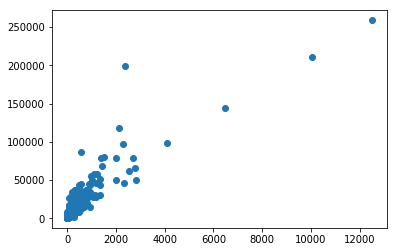

In [5]:
#plt.boxplot(raw2.loc[:, 'PropertyCrime'])
plt.scatter(raw2.PropertyCrime, raw2.Population)

In [6]:
raw2.describe()

,PropertyCrime,Population,Murder,Robbery,PopulationSq
count,347.000000,347.000000,347.000000,347.000000,3.470000e+02
mean,385.752161,15956.685879,0.138329,0.599424,9.858407e+08
std,1034.369072,27080.218837,0.345743,0.490723,5.067232e+09
min,0.000000,526.000000,0.000000,0.000000,2.766760e+05
25%,40.000000,2997.000000,0.000000,0.000000,8.982153e+06
50%,112.000000,7187.000000,0.000000,1.000000,5.165297e+07
75%,340.500000,18160.500000,0.000000,1.000000,3.298042e+08
max,12491.000000,258789.000000,1.000000,1.000000,6.697175e+10
